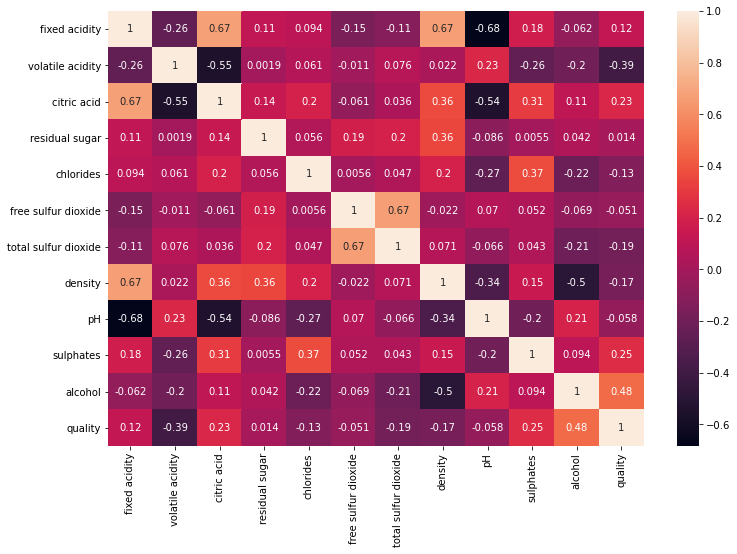

In [54]:
#Import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
import seaborn as sns
import os
wineData = pd.read_csv("winequality-red.csv")
sns.heatmap(wineData.corr(), annot=True)
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")


In [55]:
wineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [56]:
y = wineData['quality']
wineData.drop(['quality'], axis=1, inplace=True)
X = wineData

In [68]:
from sklearn.model_selection import train_test_split
XTrain, XValid, yTrain, yValid = train_test_split(X, y, 
                test_size = 0.30, random_state = 4)

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [74]:
modelOne = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('svc', SVC())   
])

In [78]:
hyperGrid = {
    'svc__C': [4.5, 5, 5.5],
    'svc__gamma': ["auto", "scale"],
    'poly__degree': [2, 3, 4]
}

In [79]:
GridS=GridSearchCV(modelOne,hyperGrid,cv=5)
GridSearch = GridS.fit(XTrain,yTrain)
yPredict = GridS.predict(XValid)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(yValid,GridS.predict(XValid))

0.64375